In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)


In [3]:
df = pd.read_csv("german_credit_data.csv")

df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
df.isnull().sum()
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)


In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,0,67,2,1169,6,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,1,22,2,5951,48,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,49,1,2096,12,True,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,3,45,2,7882,42,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,4,53,2,4870,24,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [9]:
X = df_encoded.drop('Risk_good', axis=1)
y = df_encoded['Risk_good']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.748

Classification Report:

              precision    recall  f1-score   support

       False       0.62      0.40      0.49        75
        True       0.78      0.90      0.83       175

    accuracy                           0.75       250
   macro avg       0.70      0.65      0.66       250
weighted avg       0.73      0.75      0.73       250



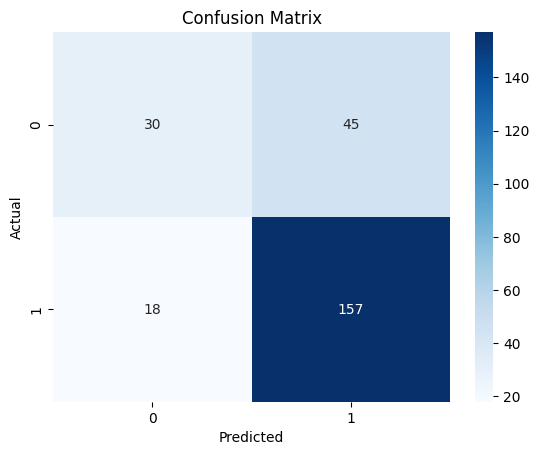

In [15]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ROC AUC Score: 0.7680761904761905


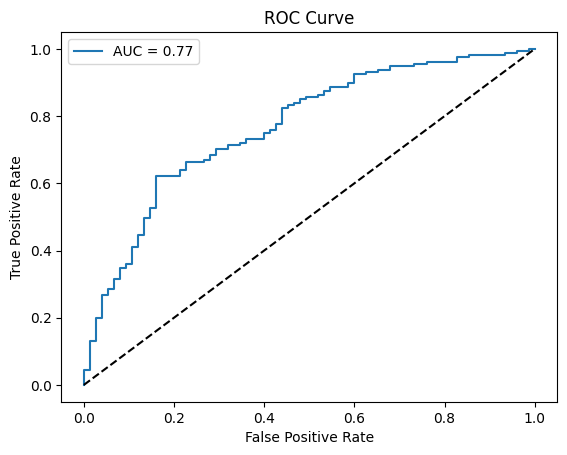

In [16]:
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [17]:
def credit_decision(prob, threshold=0.5):
    return "GOOD CREDIT" if prob >= threshold else "BAD CREDIT"
sample_prob = y_prob[0]
print("Decision:", credit_decision(sample_prob))


Decision: BAD CREDIT


In [24]:
import joblib

joblib.dump(model, "credit_scoring_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [23]:
!ls


credit_scoring_model.pkl  german_credit_data.csv  sample_data  scaler.pkl


In [26]:
import joblib

joblib.dump(model, "credit_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [27]:
from google.colab import files
files.download("credit_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>